In [1]:
import tarfile
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
with tarfile.open("E:/n01440764.tar", "r") as file:
    for i in file.getmembers():
        print(i)
    

<TarInfo 'n01440764_2708.JPEG' at 0x2325d2f2cc8>
<TarInfo 'n01440764_7173.JPEG' at 0x2325cfcd4f8>
<TarInfo 'n01440764_6388.JPEG' at 0x2325cfcd5c0>
<TarInfo 'n01440764_3198.JPEG' at 0x2325cfcd818>
<TarInfo 'n01440764_3724.JPEG' at 0x2325cfcd9a8>
<TarInfo 'n01440764_11155.JPEG' at 0x2325cfcd8e0>
<TarInfo 'n01440764_7719.JPEG' at 0x2325cfcda70>
<TarInfo 'n01440764_7304.JPEG' at 0x2325cfcdb38>
<TarInfo 'n01440764_8469.JPEG' at 0x2325cfcdc00>
<TarInfo 'n01440764_6432.JPEG' at 0x2325cfcdcc8>
<TarInfo 'n01440764_10108.JPEG' at 0x2325cfcdd90>
<TarInfo 'n01440764_5366.JPEG' at 0x2325cfcde58>
<TarInfo 'n01440764_8249.JPEG' at 0x2325cfcdf20>
<TarInfo 'n01440764_8710.JPEG' at 0x2325c75d1d8>
<TarInfo 'n01440764_8343.JPEG' at 0x2325d29b048>
<TarInfo 'n01440764_11044.JPEG' at 0x2325d29b110>
<TarInfo 'n01440764_4616.JPEG' at 0x2325d29b1d8>
<TarInfo 'n01440764_7632.JPEG' at 0x2325d29b368>
<TarInfo 'n01440764_8479.JPEG' at 0x2325d29b430>
<TarInfo 'n01440764_7877.JPEG' at 0x2325d2f2d90>
<TarInfo 'n014407

<TarInfo 'n01440764_11905.JPEG' at 0x2325d1fbb38>
<TarInfo 'n01440764_6672.JPEG' at 0x2325d1fbc00>
<TarInfo 'n01440764_7519.JPEG' at 0x2325d1fbcc8>
<TarInfo 'n01440764_10726.JPEG' at 0x2325d1fbd90>
<TarInfo 'n01440764_13464.JPEG' at 0x2325d1fbe58>
<TarInfo 'n01440764_11011.JPEG' at 0x2325d1fbf20>
<TarInfo 'n01440764_14490.JPEG' at 0x2325d200048>
<TarInfo 'n01440764_6758.JPEG' at 0x2325d200110>
<TarInfo 'n01440764_9217.JPEG' at 0x2325d2001d8>
<TarInfo 'n01440764_7514.JPEG' at 0x2325d2002a0>
<TarInfo 'n01440764_13828.JPEG' at 0x2325d200368>
<TarInfo 'n01440764_6508.JPEG' at 0x2325d200430>
<TarInfo 'n01440764_13842.JPEG' at 0x2325d2004f8>
<TarInfo 'n01440764_3325.JPEG' at 0x2325d2005c0>
<TarInfo 'n01440764_13575.JPEG' at 0x2325d200688>
<TarInfo 'n01440764_8782.JPEG' at 0x2325d200750>
<TarInfo 'n01440764_7859.JPEG' at 0x2325d200818>
<TarInfo 'n01440764_12498.JPEG' at 0x2325d2008e0>
<TarInfo 'n01440764_14435.JPEG' at 0x2325d2009a8>
<TarInfo 'n01440764_10555.JPEG' at 0x2325d200a70>
<TarInfo 

In [11]:
i.name

'n01440764_13375.JPEG'

In [4]:
import numpy as np
from PIL import Image, TarIO

fp = TarIO.TarIO("E:/n01440764.tar", "n01440764_11974.JPEG")
im = Image.open(fp)

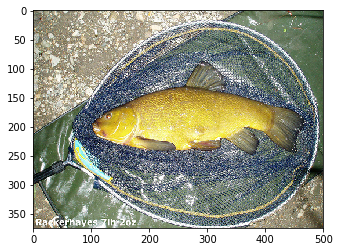

In [8]:
im = np.asarray(im)
im.flags.writeable = True;
plt.imshow(im)

In [9]:
im.shape

(375, 500, 3)